## Thực hành: Naïve Bayes trên dữ liệu Mushroom

### 1. Import thư viện & nạp dữ liệu

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv("mushrooms.csv")
print("Kích thước dữ liệu:", data.shape)
print(data.head())

Kích thước dữ liệu: (8124, 23)
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w  

### 2. Tiền xử lý dữ liệu
Tập dữ liệu Mushroom có cột class (p = poisonous, e = edible) làm nhãn.
Các cột còn lại đều là categorical → cần mã hóa thành số.
Ta dùng LabelEncoder cho từng cột.

In [12]:
# Encode tất cả các cột dạng categorical bằng LabelEncoder riêng cho từng cột
label_encoders = {}
for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# X = đặc trưng, y = nhãn (class: edible/poisonous)
X = data.drop("class", axis=1)
y = data["class"]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y )

### 3. Xây dựng mô hình Naïve Bayes
Vì dữ liệu là categorical rời rạc, ta dùng MultinomialNB.

In [13]:
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


### 4. Dự đoán & đánh giá mô hình

Accuracy: 0.812923076923077

Confusion Matrix:
 [[784  58]
 [246 537]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       842
           1       0.90      0.69      0.78       783

    accuracy                           0.81      1625
   macro avg       0.83      0.81      0.81      1625
weighted avg       0.83      0.81      0.81      1625



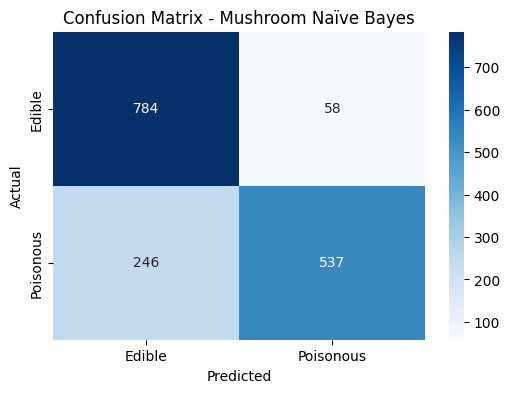

Cross-validation mean accuracy: 0.7267300492610838


In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Trực quan hóa Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Edible","Poisonous"],
            yticklabels=["Edible","Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Mushroom Naïve Bayes")
plt.show()

# Đánh giá bằng cross-validation
scores = cross_val_score(MultinomialNB(), X, y, cv=5, scoring="accuracy")
print("Cross-validation mean accuracy:", scores.mean())